# FACS analysis: pLJM1-mediated lentiviral transduction of HeLa cells with YFP-DHFRwt and YFP-DHFRcgg reporters#
* use viral stocks created in 293T cells in 04-2016 (1 ml/10cm plate) to transduce HeLa-CCL2 with reporter construct
* starve cells for 48 hours +/- TMP
* data is only from 1 replicate - cells were growing slowly so I decided to take multiple time points instead of measuring all plates
* Technical issues: HeLas are tough for FACS: since the cells are so flat and extended, a confluent plate has barely enough cells for FACS - or they are somehow lost in prep for FACS, not pelleted, lyse, cannot be filtered??, stick to sides of tube?
* plasmid reporters 1)YFP-WT: Flag-YFPwt-DHFRwt or 2) YFP-CGG: Flag-YFPcgg-DHFRcgg
* collected less than 10,000 events for each sample.  Parameters: FSC = 231, SSC = 212, FITC = 250 (brighter than transduced 293Ts and HCT116)

## Analysis 1 : consider mean of entire population of < 10000 events after 48 h starvation ##

1) thresholding for reasonable FSC/SSC values and NO fluorescence value based thresholding, 
2) plus "no tmp" subtraction,
3) plus rich condition normalization ## 

In [1]:
%matplotlib inline
from FlowCytometryTools import FCMeasurement
import matplotlib.pyplot as plt
import pandas
import numpy
from IPython.core.display import HTML
from matplotlib.ticker import MaxNLocator, LogLocator, AutoMinorLocator # custom tick locators for plots

/usr/local/lib/python2.7/dist-packages/pandas/computation/expressions.py:21: UserWarning: The installed version of numexpr 2.0.1 is not supported in pandas and will be not be used
The minimum supported version is 2.1

  "version is 2.1\n".format(ver=ver), UserWarning)


In [9]:
sampleids = {1: 'wt_rich_tmp_1',
 2: 'wt_leu_tmp_1',
 3: 'wt_arg_tmp_1',
 4: 'cgg_rich_tmp_1',
 5: 'cgg_leu_tmp_1',
 6: 'cgg_arg_tmp_1',
 7: 'wt_rich_notmp_1',
 8: 'wt_leu_notmp_1',
 9: 'wt_arg_notmp_1',
 10: 'cgg_rich_notmp_1',
 11: 'cgg_leu_notmp_1',
 12: 'cgg_arg_notmp_1',}

#make sure this is right!

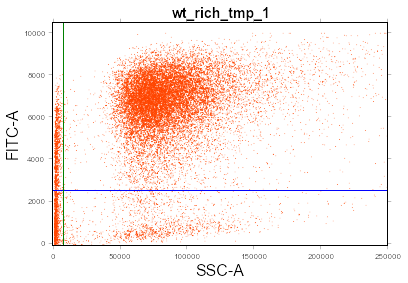

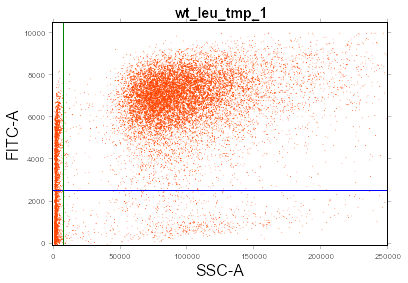

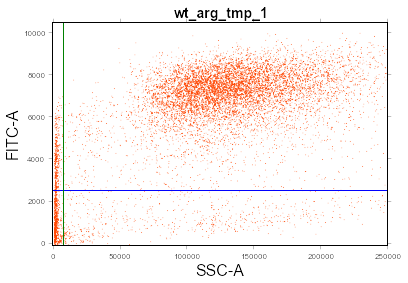

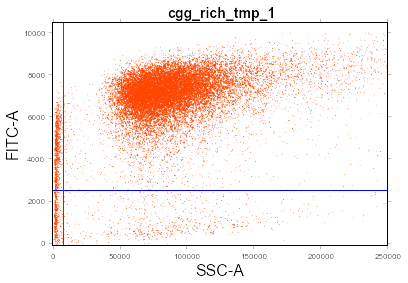

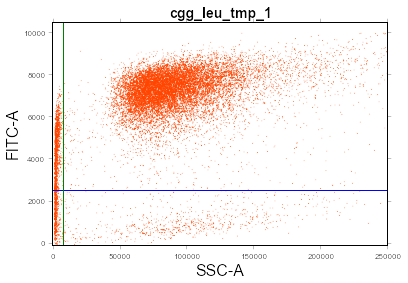

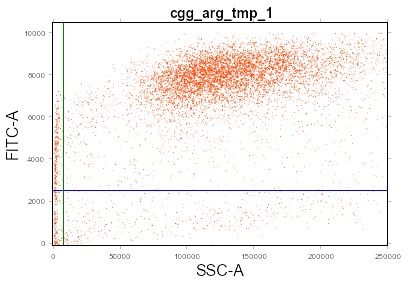

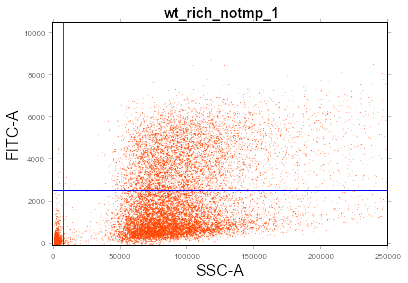

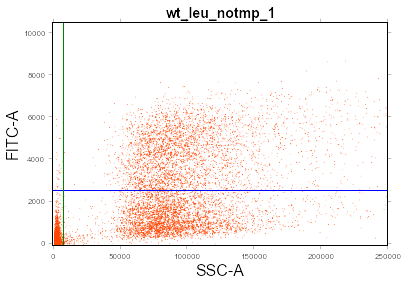

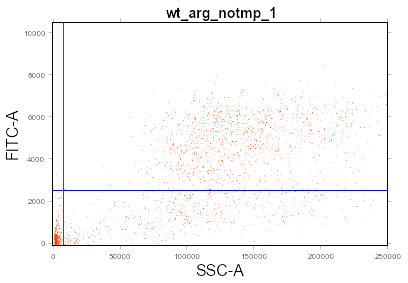

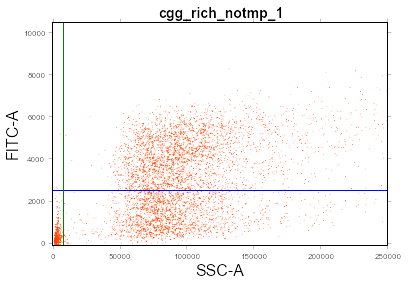

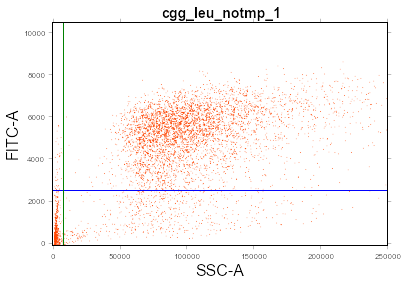

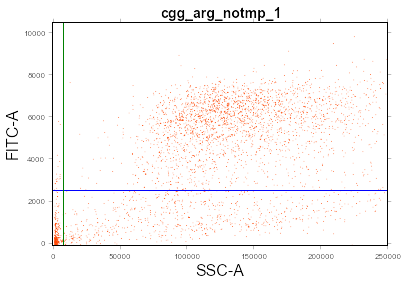

In [23]:
import os, FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate
from pylab import *

fcsFiles = !ls ../fcs_files/hela/*.fcs

for File in fcsFiles:
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    plotsample = FCMeasurement(ID= sampleid, datafile=File)
    #print plotsample.ID
    #print plotsample.channel_names  #names of lasers
    #print plotsample.channels  #useful: gives voltage values for all channels so I can keep this consisent - I changed gain of FITC to 440 in this exp.
    #print type(plotsample.data) #this is a pandas data frame with entries for fsc,ssc, and each laser, and time. 
    #print plotsample.data[['FITC-A', 'PE-A']][:10]  #this prints the 1st 10 entries in each column for FITC/mCherry values
    plotdata = plotsample.data
    #print plotdata['FITC-A'].describe()   #this prints overall statistics about the data for this sample.
    #print plotdata['FITC-A'].median()
    #print plotdata['PE-A'].median()
    #print plotdata.shape[0] #how many events are in the data"tube"
    
    #define gates based on visual analysis of scatter plot
    fitc_gate = ThresholdGate(2500.0, 'FITC-A', region='above')
    ssc_gate = ThresholdGate(8000.0, 'SSC-A', region='above')
    
    tsample = plotsample.transform('hlog', channels=['FITC-A'], b=200)   # b controls the location where the transformation shifts from linear to log. The optimal value for this parameter depends on the range of your data. For smaller ranges, try smaller values of b. So if your population doesn’t show up well, just adjust b.
    axTitle = plotsample.ID
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(-100,10500)
    ax.set_xlim(-100,250000)
    ax.set_title( axTitle, fontsize=14, fontweight='bold')
    #tsample.plot('FITC-A', color='green', bins=100) #plots a 1D histrogram
    tsample.plot(['SSC-A', 'FITC-A'], kind='scatter', gates=[fitc_gate, ssc_gate], color='orangered', s=1.5, alpha=0.85) #plots a 2d scatter plot. s value adjusts the weight of each point. alpha adjusts the transparency of each point between 1 and 0
    gatedsample = tsample.gate(fitc_gate, ssc_gate)
    
    
    

In [24]:
fcsFiles = !ls ../fcs_files/hela/*.fcs
processedGatedData = dict()
for File in fcsFiles:
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    
    processedGatedData[ sampleid ] = dict()
    
    plotsample = FCMeasurement(ID= sampleid, datafile=File)
    plotdata = plotsample.data
    
    fitc_gate = ThresholdGate(2500.0, 'FITC-A', region='above')
    ssc_gate = ThresholdGate(8000.0, 'SSC-A', region='above')
    
    tsample = plotsample.transform('hlog', channels=['FITC-A','SSC-A'], b=100)
    gatedsample = tsample.gate(fitc_gate, ssc_gate)
    gatedData = gatedsample.data
    #subset = numpy.logical_and( fcsdata.data['FSC-A'] > fsc_threshold, fcsdata.data['SSC-A'] > ssc_threshold )
    #processedGatedData[ sampleid ]['fsc_median'] = gatedData['FSC-A'].median()
    processedGatedData[ sampleid ]['fitc_mean'] = gatedData['FITC-A'].mean()
    processedGatedData[ sampleid ]['fitc_median'] = gatedData['FITC-A'].median()
    #processeddata[ sampleid ]['fitc_q25'] = fcsdata.data['FITC-A'][subset].quantile(q=0.25)    
    #processeddata[ sampleid ]['fitc_q75'] = fcsdata.data['FITC-A'][subset].quantile(q=0.75)
    #processedGatedData[ sampleid ]['mcherry_median'] = gatedData['PE-A'].median()
    #rocessedGatedData[ sampleid ]['mcherry_mean'] = gatedData['PE-A'].mean()
    #processeddata[ sampleid ]['fsc_q25'] = fcsdata.data['FSC-A'][subset].quantile(q=0.25)    
    #processeddata[ sampleid ]['fsc_q75'] = fcsdata.data['FSC-A'][subset].quantile(q=0.75)        

In [25]:
data = pandas.DataFrame.from_dict( processedGatedData, orient='index' )

In [26]:
data['samplelabel'] = data.index

In [27]:
tmpsamples = map( lambda x: x.find('notmp') == -1, data.index)
dataTmp = data[tmpsamples]
dataNoTmp = data[numpy.logical_not(tmpsamples)]
dataNoTmp.index = map( lambda x: x.replace('_notmp',''), dataNoTmp.index)
dataTmp.index = map( lambda x: x.replace('_tmp',''), dataTmp.index)

In [28]:
dataTmp

,fitc_mean,fitc_median,samplelabel
cgg_arg_1,7565.586839,7891.710938,cgg_arg_tmp_1
cgg_leu_1,7003.353736,7265.149414,cgg_leu_tmp_1
cgg_rich_1,7029.177946,7209.671387,cgg_rich_tmp_1
wt_arg_1,6866.112147,7170.673828,wt_arg_tmp_1
wt_leu_1,6687.198136,6885.681152,wt_leu_tmp_1
wt_rich_1,6607.652769,6798.041504,wt_rich_tmp_1


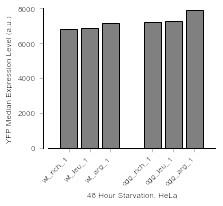

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = numpy.array([5,4,3,2,1,0])

xlocations = numpy.array([0,1,2,4,5,6])

ax.bar(xlocations, dataTmp['fitc_median'][sampleOrder], align='center' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('48 Hour Starvation, HeLa')
ax.set_xticks(xlocations)
ax.set_xticklabels(dataTmp.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Median Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
fig.savefig('../plots/hela/fitcsscgate_yfpmedian_notbackgroundsubtracted.svg')
fig.savefig('../plots/hela/fitcsscgate_yfpmedian_notbackgroundsubtracted.png')

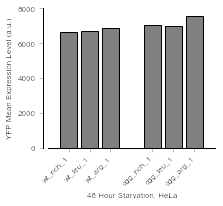

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = numpy.array([5,4,3,2,1,0])

xlocations = numpy.array([0,1,2,4,5,6])

ax.bar(xlocations, dataTmp['fitc_mean'][sampleOrder], align='center' )
#x.errorbar(xlocations, meanSubtractedData['mean'][sampleOrder], 
            #meanSubtractedData['std'][sampleOrder], linestyle='None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('48 Hour Starvation, HeLa')
ax.set_xticks(xlocations)
ax.set_xticklabels(dataTmp.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Mean Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
fig.savefig('../plots/hela/fitcsscgate_yfpmean_notbackgroundsubtracted.svg')
fig.savefig('../plots/hela/fitcsscgate_yfpmean_notbackgroundsubtracted.png')

##Redo Analysis with "no TMP" data subtraction and no gating for YFP+ cells##

In [34]:
fcsFiles = !ls ../fcs_files/hela/*.fcs
processedGatedData = dict()
for File in fcsFiles:
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    
    processedGatedData[ sampleid ] = dict()
    
    plotsample = FCMeasurement(ID= sampleid, datafile=File)
    plotdata = plotsample.data
    
    
    ssc_gate = ThresholdGate(8000.0, 'SSC-A', region='above')
    
    tsample = plotsample.transform('hlog', channels=['FITC-A'], b=100)
    gatedsample = tsample.gate(ssc_gate)
    gatedData = gatedsample.data
    #subset = numpy.logical_and( fcsdata.data['FSC-A'] > fsc_threshold, fcsdata.data['SSC-A'] > ssc_threshold )
    #processedGatedData[ sampleid ]['fsc_median'] = gatedData['FSC-A'].median()
    processedGatedData[ sampleid ]['fitc_mean'] = gatedData['FITC-A'].mean()
    processedGatedData[ sampleid ]['fitc_median'] = gatedData['FITC-A'].median()
    #processeddata[ sampleid ]['fitc_q25'] = fcsdata.data['FITC-A'][subset].quantile(q=0.25)    
    #processeddata[ sampleid ]['fitc_q75'] = fcsdata.data['FITC-A'][subset].quantile(q=0.75)
    #processedGatedData[ sampleid ]['mcherry_median'] = gatedData['PE-A'].median()
    #rocessedGatedData[ sampleid ]['mcherry_mean'] = gatedData['PE-A'].mean()
    #processeddata[ sampleid ]['fsc_q25'] = fcsdata.data['FSC-A'][subset].quantile(q=0.25)    
    #processeddata[ sampleid ]['fsc_q75'] = fcsdata.data['FSC-A'][subset].quantile(q=0.75)        

In [35]:
data = pandas.DataFrame.from_dict( processedGatedData, orient='index' )

In [36]:
data['samplelabel'] = data.index

In [37]:
tmpsamples = map( lambda x: x.find('notmp') == -1, data.index)
dataTmp = data[tmpsamples]
dataNoTmp = data[numpy.logical_not(tmpsamples)]
dataNoTmp.index = map( lambda x: x.replace('_notmp',''), dataNoTmp.index)
dataTmp.index = map( lambda x: x.replace('_tmp',''), dataTmp.index)

In [38]:
dataTmp

,fitc_mean,fitc_median,samplelabel
cgg_arg_1,7471.244721,7902.011230,cgg_arg_tmp_1
cgg_leu_1,7006.774539,7337.820312,cgg_leu_tmp_1
cgg_rich_1,6986.244130,7232.083984,cgg_rich_tmp_1
wt_arg_1,6764.937454,7182.385742,wt_arg_tmp_1
wt_leu_1,6695.176931,6990.285156,wt_leu_tmp_1
wt_rich_1,6427.614009,6812.731445,wt_rich_tmp_1


In [39]:
dataNoTmp

,fitc_mean,fitc_median,samplelabel
cgg_arg_1,5095.801080,5611.755859,cgg_arg_notmp_1
cgg_leu_1,5257.086127,5521.389404,cgg_leu_notmp_1
cgg_rich_1,3852.751367,4105.853516,cgg_rich_notmp_1
wt_arg_1,4428.117772,4773.590576,wt_arg_notmp_1
wt_leu_1,3569.514127,3694.546387,wt_leu_notmp_1
wt_rich_1,3186.003709,3151.542480,wt_rich_notmp_1


In [40]:
subtractedData = pandas.DataFrame()
subtractedData['mean'] = dataTmp['fitc_mean'] - dataNoTmp['fitc_mean']
subtractedData['median'] = dataTmp['fitc_median'] - dataNoTmp['fitc_median']

In [41]:
subtractedData

,mean,median
cgg_arg_1,2375.443641,2290.255371
cgg_leu_1,1749.688411,1816.430908
cgg_rich_1,3133.492763,3126.230469
wt_arg_1,2336.819683,2408.795166
wt_leu_1,3125.662804,3295.738770
wt_rich_1,3241.610300,3661.188965


In [45]:
subtractedData['normalizedMean'] = map(lambda row: 
                                           row[1]['mean']/subtractedData.ix['cgg_rich_1']['mean'] 
                                           if row[0].find('cgg') != -1
                                           else row[1]['mean']/subtractedData.ix['wt_rich_1']['mean']
                                           , subtractedData.iterrows())

subtractedData['normalizedMedian'] = map(lambda row: 
                                           row[1]['median']/subtractedData.ix['cgg_rich_1']['median'] 
                                           if row[0].find('cgg') != -1
                                           else row[1]['median']/subtractedData.ix['wt_rich_1']['median']
                                           , subtractedData.iterrows())

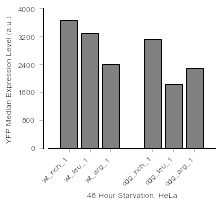

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = numpy.array([5,4,3,2,1,0])

xlocations = numpy.array([0,1,2,4,5,6])

ax.bar(xlocations, subtractedData['median'][sampleOrder], align='center' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('48 Hour Starvation, HeLa')
ax.set_xticks(xlocations)
ax.set_xticklabels(dataTmp.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Median Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
fig.savefig('../plots/hela/sscgate_yfpmedian_tmpbackgroundsubtracted.svg')
fig.savefig('../plots/hela/sscgate_yfpmedian_tmpbackgroundsubtracted.png')

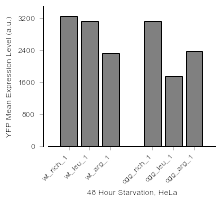

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = numpy.array([5,4,3,2,1,0])

xlocations = numpy.array([0,1,2,4,5,6])

ax.bar(xlocations, subtractedData['mean'][sampleOrder], align='center' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('48 Hour Starvation, HeLa')
ax.set_xticks(xlocations)
ax.set_xticklabels(dataTmp.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Mean Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
fig.savefig('../plots/hela/sscgate_yfpmean_tmpbackgroundsubtracted.svg')
fig.savefig('../plots/hela/sscgate_yfpmean_tmpbackgroundsubtracted.png')

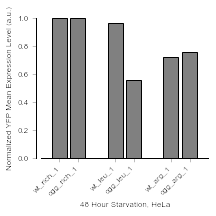

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = numpy.array([5,2,4,1,3,0])

xlocations = numpy.array([0,1,3,4,6,7])

ax.bar(xlocations, subtractedData['normalizedMean'][sampleOrder], align='center' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('48 Hour Starvation, HeLa')
ax.set_xticks(xlocations)
ax.set_xticklabels(dataTmp.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'Normalized YFP Mean Expression Level (a.u.)')

fig.set_size_inches([3,2.5])
fig.savefig('../plots/hela/sscgate_yfpmean_richnormalized_tmpbackgroundsubtracted.svg')
fig.savefig('../plots/hela/sscgate_yfpmean_rich_normalized_tmpbackgroundsubtracted.png')

data makes sense if normalized to -leu, but not rich... issue is "no tmp" subtraction, since cgg-arg is absolutely the highest but also the leakiest. 